In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import os
import analysis_kit as ak

In [3]:
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera'

In [4]:
ff_data=pd.read_csv("data\\Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0, parse_dates=True, header=0,
                    na_values="-99.99")

In [5]:
ff_data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [6]:
columns=["Lo 20","Hi 20"]

In [7]:
rets=ff_data[columns]
rets.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [8]:
rets=rets/100
rets.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


##### What was the Annualized Return of the both Lo and Hi 20 portfolio over the entire period?

In [9]:
avgret=rets.mean()
avgret

Lo 20    0.015904
Hi 20    0.009434
dtype: float64

In [10]:
no_of_obs=rets.shape[0]

In [11]:
ret_per_month= (rets+1).prod()**(1/no_of_obs)-1
ret_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [12]:
ann_ret=((1+ret_per_month)**12)-1
ann_ret

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

### OR

In [13]:
ann_ret1=((1+rets).prod())**(12/no_of_obs)-1
ann_ret1

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

#### So, the annualized return turns out to be 15.19%

### Annualized vol of Lo 20 portfolio

In [14]:
periodic_vol=rets.std()
periodic_vol

Lo 20    0.097197
Hi 20    0.056325
dtype: float64

In [15]:
ann_vol=periodic_vol*(12**0.5)
ann_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

#### What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

In [16]:
rets.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [17]:
# First change the index to a proper datetime df

rets.index=pd.to_datetime(rets.index, format="%Y%m").to_period("M")
rets.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [18]:
periodic_vol=rets["1999":"2016"].std()
periodic_vol

Lo 20    0.065428
Hi 20    0.049052
dtype: float64

In [19]:
ann_vol=periodic_vol*(12**0.5)
ann_vol

Lo 20    0.226651
Hi 20    0.169922
dtype: float64

In [20]:
ret_per_period1=((1+rets["1999":"2016"]).prod())**(1/no_of_obs)-1
ret_per_period1

Lo 20    0.001805
Hi 20    0.001049
dtype: float64

In [21]:
ann_ret2=((1+ret_per_period1)**(12))-1
ann_ret2

Lo 20    0.021874
Hi 20    0.012659
dtype: float64

### OR

In [22]:
ann_ret3=((1+rets["1999":"2016"]).prod())**(12/no_of_obs)-1
ann_ret3

Lo 20    0.021874
Hi 20    0.012659
dtype: float64

### Max Drawdown

#### What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

In [23]:
# First, lets construct a wealth index

wealth_index=1000*(1+rets["1999":"2016"]).cumprod()
wealth_index

,Lo 20,Hi 20
1999-01,1111.400000,1015.300000
1999-02,1067.055140,997.836840
1999-03,1034.189842,1034.557236
1999-04,1119.407085,1104.803672
1999-05,1168.101293,1099.500614
...,...,...
2016-08,6902.672124,3066.523010
2016-09,7138.053243,3079.709059
2016-10,6636.961905,3011.955460
2016-11,7231.633692,3163.155624


In [24]:
wealth_index.plot()

In [25]:
# Now lets compute the previous peaks

previous_peaks=wealth_index.cummax()
previous_peaks.head()

,Lo 20,Hi 20
1999-01,1111.400000,1015.300000
1999-02,1111.400000,1015.300000
1999-03,1111.400000,1034.557236
1999-04,1119.407085,1104.803672
1999-05,1168.101293,1104.803672


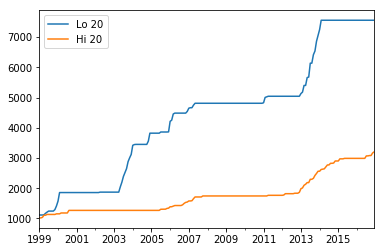

In [26]:
previous_peaks.plot()

In [27]:
drawdown=(wealth_index-previous_peaks)/previous_peaks
drawdown

,Lo 20,Hi 20
1999-01,0.000000,0.0000
1999-02,-0.039900,-0.0172
1999-03,-0.069471,0.0000
1999-04,0.000000,0.0000
1999-05,0.000000,-0.0048
...,...,...
2016-08,-0.086736,-0.0006
2016-09,-0.055594,0.0000
2016-10,-0.121891,-0.0220
2016-11,-0.043213,0.0000


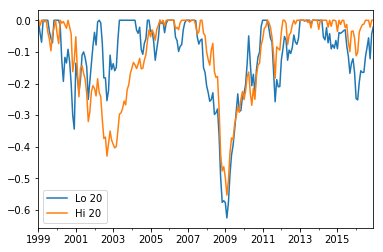

In [28]:
drawdown.plot()

In [29]:
drawdown.min()

Lo 20   -0.624809
Hi 20   -0.552735
dtype: float64

In [30]:
drawdown.idxmin()

Lo 20    2009-02
Hi 20    2009-02
dtype: period[M]

### Semi-deviation and VaRs

In [55]:
edhec_hfi=pd.read_csv("data\\edhec-hedgefundindices.csv", index_col=0, header=0, parse_dates=True)
edhec_hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.21,-0.58,0.93,0.40,-0.10,0.55,0.22,-0.14,0.67,-0.21,0.45,-0.52,0.18
2018-08-31,0.24,1.66,0.02,-2.77,0.04,0.11,0.17,-0.07,0.35,0.50,-0.02,-2.14,0.15
2018-09-30,0.34,-0.54,0.50,-1.10,-0.16,0.32,0.36,0.06,-0.23,0.28,0.18,0.36,-0.22


In [34]:
edhec_hfi=edhec_hfi/100

In [44]:
# Lookin only at the data from 2009 to 2018

edhec_hfi=edhec_hfi["2009":]
edhec_hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01-31,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02-28,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03-31,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04-30,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05-31,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08-31,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09-30,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [47]:
# Normal std

edhec_hfi.std().sort_values(ascending=True)

Equity Market Neutral     0.006190
Merger Arbitrage          0.006468
Fixed Income Arbitrage    0.007649
Relative Value            0.009510
Global Macro              0.010381
Funds Of Funds            0.010736
Convertible Arbitrage     0.013693
Event Driven              0.014713
Distressed Securities     0.015791
Long/Short Equity         0.016908
CTA Global                0.019843
Emerging Markets          0.023560
Short Selling             0.034306
dtype: float64

In [48]:
edhec_hfi.mean().sort_values()

Short Selling            -0.010350
CTA Global                0.000497
Funds Of Funds            0.002470
Equity Market Neutral     0.002556
Global Macro              0.002676
Merger Arbitrage          0.003716
Emerging Markets          0.005205
Long/Short Equity         0.005209
Relative Value            0.005452
Fixed Income Arbitrage    0.005478
Event Driven              0.005595
Distressed Securities     0.006559
Convertible Arbitrage     0.006623
dtype: float64

In [49]:
no_of_obs=edhec_hfi.shape[0]
no_of_obs

119

In [50]:
# Semi deviation


edhec_hfi[edhec_hfi<edhec_hfi.mean()].std(ddof=0).sort_values(ascending=True)

Fixed Income Arbitrage    0.004087
Merger Arbitrage          0.004440
Equity Market Neutral     0.005182
Global Macro              0.005398
Relative Value            0.006249
Convertible Arbitrage     0.006904
Funds Of Funds            0.008297
Distressed Securities     0.010579
Event Driven              0.010776
CTA Global                0.011090
Long/Short Equity         0.012636
Emerging Markets          0.015792
Short Selling             0.019846
dtype: float64

### Skewness

In [54]:
ak.skewness(edhec_hfi).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

### Kurtosis

In [57]:
edhec_hfi1=edhec_hfi["2000":]
edhec_hfi1.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01-31,2.27,1.28,0.88,0.77,0.75,0.88,0.41,0.21,0.75,1.43,1.73,4.27,1.69
2000-02-29,2.67,-0.22,4.21,5.28,2.53,3.46,0.97,4.08,6.99,2.39,1.85,-13.40,6.66
2000-03-31,2.43,-1.38,1.03,3.18,1.34,0.69,-0.61,-1.04,0.06,1.31,1.63,-2.30,0.39
2000-04-30,2.23,-2.41,-1.01,-5.41,1.68,-0.59,-0.06,-3.04,-2.01,1.88,0.92,10.28,-2.69
2000-05-31,1.49,1.14,-1.32,-4.33,0.62,-0.34,1.07,-0.70,-0.97,1.46,0.80,7.04,-1.22


In [58]:
ak.kurtosis(edhec_hfi1).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64